In [10]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

seed = 10

In [12]:
from sklearn import datasets
iris = datasets.load_iris()
heads = ['Sepal Length(CM)', 'Sepal Width(CM)', 'Petal Length(CM)', 'Petal Width(CM)', 'Variety']
df = pd.read_csv(iris.filename, delimiter = ',', header = 0, names = heads)

df.head()

,Sepal Length(CM),Sepal Width(CM),Petal Length(CM),Petal Width(CM),Variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
le = LabelEncoder()
le.fit(df['Variety'].values)
y = le.transform(df['Variety'].values)
x = df.drop('Variety', axis = 1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.34, stratify = y, random_state = seed)

<h1>Exercise 1.1</h1>

In [14]:
tree = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 5, min_samples_split = 5, max_depth = None, random_state = seed)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score:: {}'.format(accuracy))

DecisionTreeClassifier accuracy score:: 0.9615384615384616


What is the accuracy of the model?
- The accuracy is 0.9615384615384616 (96%)

<h1>Exercise 1.2</h1>

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

Confusion Matrix is
[[17  0  0]
 [ 0 17  1]
 [ 0  1 16]]


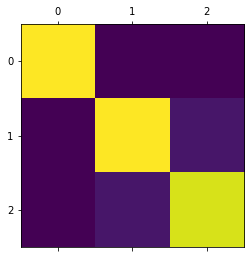

In [16]:
print('Confusion Matrix is') 
print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred) 
plt.matshow(cm) 
plt.show()

<h1>Exercise 1.3</h1>

Using the generated confusion matrix, compute the following:
Recall of class 0:
- 100%
Precision of class 1:
- 94%
Positive True of class 2:
- 94%
Accuracy of all classes: 
- 96%

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels=df['Variety'].unique()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        18
           2       0.94      0.94      0.94        17

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52



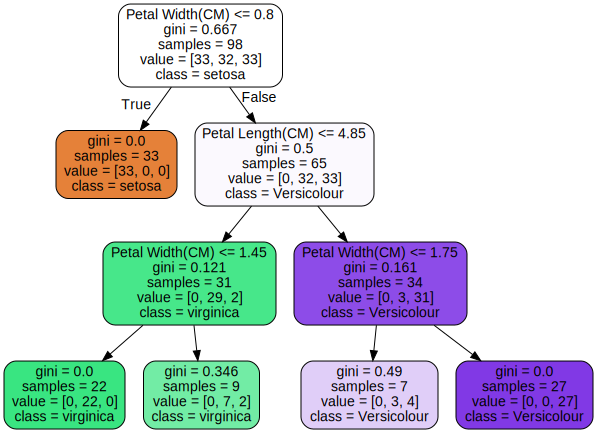

In [18]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

def plot_tree(tree, dataframe, label_col, label_encoder, plot_title):
    label_names = ['setosa','virginica','Versicolour']
    # Obtaining plot data.
    graph_data = export_graphviz(tree,
                                 feature_names=dataframe.drop(label_col, axis=1).columns,
                                 class_names=label_names,
                                 filled=True,
                                 rounded=True,
                                 out_file=None)
    graph = graphviz.Source(graph_data)
    graph.render(plot_title, view = True)
    return graph
tree_graph = plot_tree(tree, df, 'Variety', le, 'Iris')
tree_graph

<h1>Exercise 2.1</h1>

In [19]:
weather=['Rainy','Rainy','Overcast','Sunny','Sunny','Sunny',
         'Overcast','Rainy','Rainy','Sunny','Rainy','Overcast',
         'Overcast','Sunny']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool'
      'Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [20]:
import pandas as pd
data= {'weather': ['Rainy','Rainy','Overcast','Sunny','Sunny','Sunny',
                   'Overcast','Rainy','Rainy','Sunny','Rainy','Overcast',
                   'Overcast','Sunny'],
      'temp': ['Hot','Hot','Hot','Mild','Cool','Cool','Cool',
                'Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
      'play': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}
data= pd.DataFrame(data)
data

,weather,temp,play
0,Rainy,Hot,No
1,Rainy,Hot,No
2,Overcast,Hot,Yes
3,Sunny,Mild,Yes
4,Sunny,Cool,Yes
5,Sunny,Cool,No
6,Overcast,Cool,Yes
7,Rainy,Mild,No
8,Rainy,Cool,Yes
9,Sunny,Mild,Yes


<h1>Exercise 2.2</h1>

In [21]:
wheather_encoded=le.fit_transform(data['weather'])
print (wheather_encoded)

[1 1 0 2 2 2 0 1 1 2 1 0 0 2]


In [22]:
temp_encoded=le.fit_transform(data['temp'])
label=le.fit_transform(data['play'])
print ("Weather:",wheather_encoded)
print ("Temp:",temp_encoded)
print ("Play:",label)

Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [23]:
features=zip(wheather_encoded,temp_encoded)
features_ls= list(features)
print(features_ls)

[(1, 1), (1, 1), (0, 1), (2, 2), (2, 0), (2, 0), (0, 0), (1, 2), (1, 0), (2, 2), (1, 2), (0, 2), (0, 1), (2, 2)]


<h1>Exercise 2.3</h1>

Repeat the experiment again but now using Gaussian Naïve Bayes (just replace model= GaussianNB())! Is the result the same?
- Yes